In [2]:
# Imports
import cvxpy as cvx
import numpy as np

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Constants
n_features = 2
n_samples  = 100

In [26]:
def make_blobs(n_samples, n_features, center1=[0,0], center2=[1,0]):
    x = []; y = []
    
    # parameters
    noise_intensity = 0.8
    
    
    noise = noise_intensity*np.random.random((n_samples/2, 2))
    noise = noise - noise.mean()
    
    # create class 1 samples
    x.extend(center1 + noise)
    y.extend([-1]*(n_samples/2))
    
    # create class 2 samples
    x.extend(center2 + noise)
    y.extend([1]*(n_samples/2))
    
    return np.array(x), np.array(y)



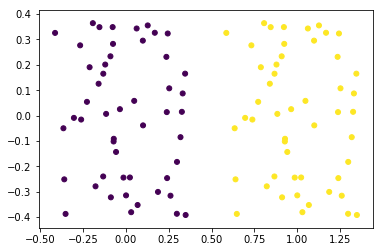

In [60]:
# Generate dataset
x_train, y_train = make_blobs(n_samples, n_features)
plt.scatter(x_train[:,0], x_train[:, 1], marker='o', c=y_train, s=25)

In [61]:
# Formulate the optimization problem (hard margin SVM)
w = cvx.Variable(n_features)
b = cvx.Variable()

# Constraints
constraints = []
for i in range(n_samples):
    constraints.append(y_train[i]*(x_train[i,:]*w+b) >= 1)
    
# Loss function 
loss = cvx.norm(w, 2)

# Objective function
objective = cvx.Minimize(loss)
objective = cvx.Minimize(loss)

# Optimization problem
prob = cvx.Problem(objective, constraints)

In [62]:
# Solve the problem
prob.solve()
prob.status

'optimal'

In [63]:
w_optimal = np.array(w.value)
b_optimal = np.array(b.value)

print('w:', w_optimal, 'b:', b_optimal)

('w:', array([[ 7.86405063],
       [ 0.67650135]]), 'b:', array(-3.8274588762883295))


In [64]:
# Auxiliary hyperplane plotting function

def plot_hyperplane(x, y, w, b):
    m = - w[0] / w[1]
    b = - b / w[1]

    xx = np.linspace(-5, 5)
    yy = m * xx + b

    plt.scatter(x[:,0], x[:, 1], marker='o', c=y, s=25)
    plt.plot(xx, yy)
    plt.axis([x[:, 0].min(), x[:, 0].max(), x[:, 1].min(), x[:, 1].max()])

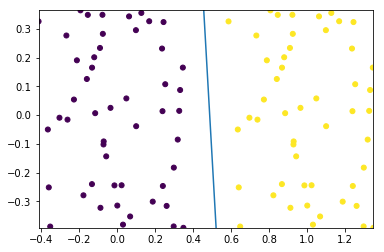

In [65]:
# Plot the SVM hyperplane

plot_hyperplane(x_train, y_train, w_optimal, b_optimal)

What if the samples are not separable?

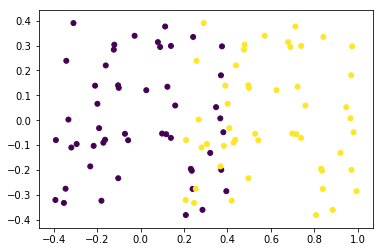

In [66]:
x_train, y_train = make_blobs(n_samples, n_features, center1=[0,0], center2=[0.6,0])
plt.scatter(x_train[:,0], x_train[:, 1], marker='o', c=y_train, s=25)


In [67]:
# Alternative formulation where the samples overlap (soft margin SVM)

w = cvx.Variable(n_features)
b = cvx.Variable()
epsilon = cvx.Variable(n_samples)

# Constraints
constraints = []
for i in range(n_samples):
    constraints.append(y_train[i]*(x_train[i,:]*w+b) >= 1 - epsilon[i])
    
# Loss function 
loss = cvx.norm(w, 2) + cvx.norm(epsilon, 2)

# Objective function
objective = cvx.Minimize(loss)
objective = cvx.Minimize(loss)

# Optimization problem
prob = cvx.Problem(objective, constraints)

In [68]:
# Solve the problem
prob.solve()
prob.status

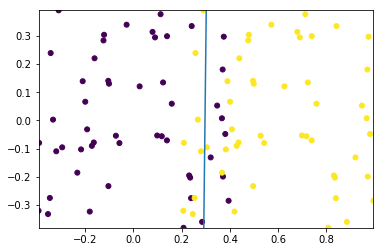

In [71]:
w_optimal = np.array(w.value)
b_optimal = np.array(b.value)
plot_hyperplane(x_train, y_train, w_optimal, b_optimal)